In [2]:
import argparse  
from code_part1 import foo
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

# Part 1

### 1A

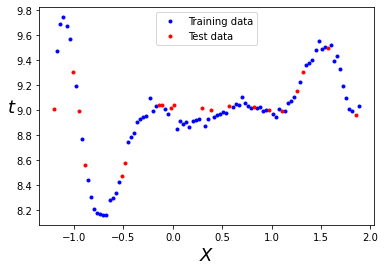

In [15]:
df = pd.read_csv("1A.csv", header=None)
df = df.sample(n = len(df))
train_df = df[:int(0.8*len(df))].sample(frac=1)
test_df = df[int(0.8*len(df)):].sample(frac=1)
# Convert everything to a numpy array, as it makes my life easy. Works pretty much like MATLAB after that
train_X = np.array(train_df.values)[:, 0:1]
train_y = np.array(train_df.values)[:, 1:]
test_X = np.array(test_df.values)[:, 0:1]
test_y = np.array(test_df.values)[:, 1:2]

plt.plot(train_X, train_y, "b.", label="Training data")
plt.plot(test_X, test_y, "r.", label="Test data")
plt.legend(loc="upper center")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$t$", rotation=0, fontsize=18)
plt.savefig('given_data_plot_1A_20.png')
plt.show()

# Pinv

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.pinv(X_b).dot(y)
theta_best

X_new = np.array([[-1.5], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
# plt.axis([0, 2, 0, 15])
plt.show()

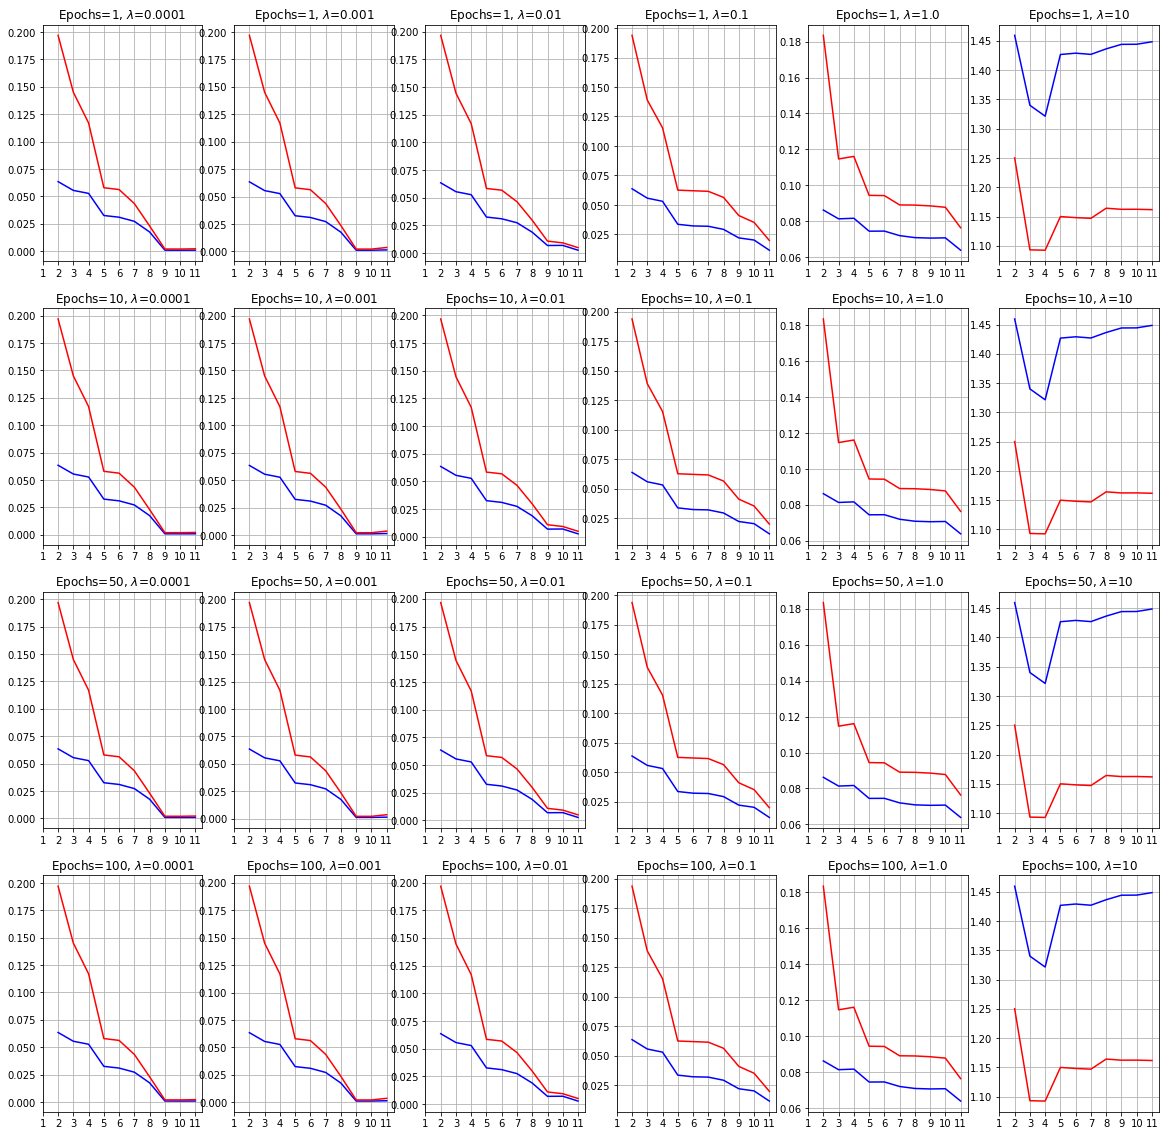

In [124]:
temp_X_train = train_X
X_new_train = train_X

temp_X_test = test_X
X_new_test = test_X

M = np.arange(2,12)
lamb = 0.1

# for m in M:
#     temp_X_train = temp_X_train*train_X
#     X_new_train = np.c_[X_new_train, temp_X_train]
#     X_fin = np.c_[np.ones((len(X_new_train), 1)), X_new_train]
#     theta_best = np.linalg.inv((lamb*np.identity(m+1)) + X_fin.T.dot(X_fin)).dot(X_fin.T).dot(train_y)
#     y_hat = X_fin.dot(theta_best)
#     plt.plot(train_X, y_hat, "r.")
#     plt.plot(train_X, train_y, "b.")
#     plt.show()

lambs = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]
# lambs = np.logspace(-200, -1, num=20)
# lambs = [1e-50, 1e-20, 1e-10, 1e-5, 1e-3]
EPOCHS = [1, 10, 50, 100]
# EPOCHS = [1, 5]
# EPOCHS = [1, 3, 5, 7, 9]

figure, axes = plt.subplots(nrows=len(EPOCHS), ncols=len(lambs), figsize=(20,20))

for idx_ep, n_epochs in enumerate(EPOCHS):
    for idx_lm, lamb in enumerate(lambs):
        E_rms_train = []
        E_rms_test = []
        minerr = 1e4

        temp_X_train = train_X
        X_new_train = train_X

        temp_X_test = test_X
        X_new_test = test_X

        for m in M:
            temp_X_train = temp_X_train*train_X
            X_new_train = np.c_[X_new_train, temp_X_train]
            X_fin_train = np.c_[np.ones((len(X_new_train), 1)), X_new_train]
            theta_best1 = np.linalg.pinv(X_fin_train).dot(train_y)
            theta_best = np.linalg.inv((lamb*np.identity(m+1)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(train_y)
            y_hat_train = X_fin_train.dot(theta_best)
            temp_val_train = sum((y_hat_train-train_y)**2)
            temp_val_train/=len(train_y)
            E_rms_train.append(temp_val_train)

            temp_X_test = temp_X_test*test_X
            X_new_test = np.c_[X_new_test, temp_X_test]
            X_fin_test = np.c_[np.ones((len(X_new_test), 1)), X_new_test]
            y_hat_test = X_fin_test.dot(theta_best)
            temp_val_test = sum((y_hat_test-test_y)**2)
            temp_val_test/=len(test_y)
            E_rms_test.append(temp_val_test) 
#             if (m==5):
#                 bestwt = theta_best
#                 bestm = m

        axes[idx_ep, idx_lm].plot(M, E_rms_train, "b-", label="Training Error")
        axes[idx_ep, idx_lm].plot(M, E_rms_test, "r-", label="Test Error")
        xticks = np.arange(1, max(M)+1, 1)
        axes[idx_ep, idx_lm].set_xticks(xticks)
        axes[idx_ep, idx_lm].grid()
        axes[idx_ep, idx_lm].set_title(r"Epochs=%s, $\lambda$=%s"%(n_epochs, lamb))
#         print("Training error at m=5 = %s, Test error = %s"%(E_rms_train, E_rms_test))
# figure.legend(('Training Error', 'Test Error'), 'upper left')
plt.savefig('epoch_lambda_100.png')
plt.show() 

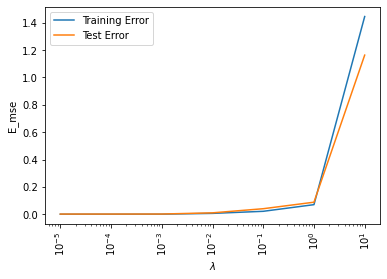

In [125]:
temp_X_train = train_X
X_new_train = train_X

temp_X_test = test_X
X_new_test = test_X

lambs = np.logspace(-5, 1, num=7)

for m in range(2, 10):
    temp_X_train = temp_X_train*train_X
    X_new_train = np.c_[X_new_train, temp_X_train]
    temp_X_test = temp_X_test*test_X
    X_new_test = np.c_[X_new_test, temp_X_test]


X_fin_train = np.c_[np.ones((len(X_new_train), 1)), X_new_train]    
X_fin_test = np.c_[np.ones((len(X_new_test), 1)), X_new_test]

E_rms_train = []
E_rms_test = []

for lamb in lambs:

        theta_best = np.linalg.inv((lamb*np.identity(m+1)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(train_y)
        y_hat_train = X_fin_train.dot(theta_best)
        temp_val_train = sum((y_hat_train-train_y)**2)
        temp_val_train/=len(train_y)
        E_rms_train.append(temp_val_train)

        y_hat_test = X_fin_test.dot(theta_best)
        temp_val_test = sum((y_hat_test-test_y)**2)
        temp_val_test/=len(test_y)
        E_rms_test.append(temp_val_test) 

plt.xscale("log")
plt.plot(lambs, E_rms_train, label="Training Error")
plt.plot(lambs, E_rms_test, label="Test Error")
plt.legend(loc="upper left")
# xticks = np.logspace(-20, -1, num=20)
plt.xticks(lambs, rotation=90)
plt.xlabel("$\lambda$")
plt.ylabel("E_mse")
plt.savefig('something for 20.png')
plt.show() 


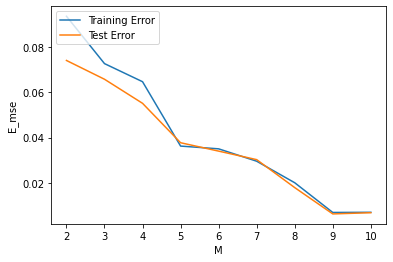

In [65]:
temp_X_train = train_X
X_new_train = train_X

temp_X_test = test_X
X_new_test = test_X

# lambs = np.logspace(-5, 1, num=7)
lamb = 0.01
M = np.arange(2, 11, 1)
E_rms_train = []
E_rms_test = []

for m in M:
    temp_X_train = temp_X_train*train_X
    X_new_train = np.c_[X_new_train, temp_X_train]
    temp_X_test = temp_X_test*test_X
    X_new_test = np.c_[X_new_test, temp_X_test]


    X_fin_train = np.c_[np.ones((len(X_new_train), 1)), X_new_train]    
    X_fin_test = np.c_[np.ones((len(X_new_test), 1)), X_new_test]

# for lamb in lambs:

    theta_best = np.linalg.inv((lamb*np.identity(m+1)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(train_y)
    y_hat_train = X_fin_train.dot(theta_best)
    temp_val_train = sum((y_hat_train-train_y)**2)
    temp_val_train/=len(train_y)
    E_rms_train.append(temp_val_train)

    y_hat_test = X_fin_test.dot(theta_best)
    temp_val_test = sum((y_hat_test-test_y)**2)
    temp_val_test/=len(test_y)
    E_rms_test.append(temp_val_test) 

# plt.xscale("log")
# plt.plot(lambs, E_rms_train, label="Training Error")
# plt.plot(lambs, E_rms_test, label="Test Error")
plt.plot(M, E_rms_train, label="Training Error")
plt.plot(M, E_rms_test, label="Test Error")
plt.legend(loc="upper left")
# xticks = np.logspace(-20, -1, num=20)
# plt.xticks(lambs, rotation=90)
plt.xticks(M)
# plt.xlabel("$\eta$")
plt.xlabel("M")
plt.ylabel("E_mse")
# plt.savefig('something for 20.png')
plt.show() 

[9.02385692] [-0.00924317] [-1.09518712] [2.90136935] [-1.05650841] [-4.40413621] [4.25729037] [0.86808246] [-2.0420804] [0.5448224]


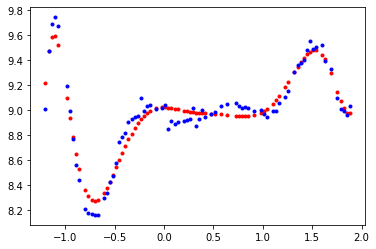

In [70]:
X_new_train = train_X
temp_X_train = train_X
for m in range(2, 10, 1):
    temp_X_train = temp_X_train*train_X
    X_new_train = np.c_[X_new_train, temp_X_train]
    
X_fin_train = np.c_[np.ones((len(X_new_train), 1)), X_new_train]    
    
theta_best = np.linalg.inv((lamb*np.identity(m+1)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(train_y)
print(*theta_best)

plt.plot(train_X, X_fin_train.dot(theta_best), 'r.')
plt.plot(train_X, train_y, 'b.')
plt.show()

# Rough Work

In [92]:
# print(X[:10])
X_temp = X
tt = [i ** 2 for i in X_temp]
# print(tt[:10])
nen = np.c_[X_temp, tt]
# pp = tt*X
# nen = np.array([nen, pp])
# print(nen)

X_b = np.c_[np.ones((100, 1)), nen]  # add x0 = 1 to each instance
# X_b = nen
print(X_b[:5])
theta_best = np.linalg.pinv(X_b).dot(y)
y_predict = X_b.dot(theta_best)
plt.plot(X, y_predict, "r.")
plt.plot(X, y, "b.")
# plt.axis([0, 2, 0, 15])
plt.show()

# Gradient Descent

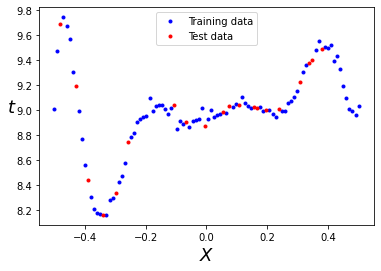

In [140]:
df = pd.read_csv("1A.csv", header=None)
df = df.sample(n = len(df))
# train_df = df[:int(0.8*len(df))].sample(frac=1.0)
# test_df = df[int(0.8*len(df)):].sample(frac=1.0)
# # Convert everything to a numpy array, as it makes my life easy. Works pretty much like MATLAB after that
# train_X = np.array(train_df.values)[:, 0:1]
# train_y = np.array(train_df.values)[:, 1:]
# test_X = np.array(test_df.values)[:, 0:1]
# test_y = np.array(test_df.values)[:, 1:]

# plt.plot(train_X, train_y, "b.", label="Training data")
# plt.plot(test_X, test_y, "r.", label="Test data")
# plt.legend(loc="upper center")
# plt.xlabel("$X$", fontsize=18)
# plt.ylabel("$t$", rotation=0, fontsize=18)
# plt.savefig('given_data_plot_1A_20.png')
# plt.show()


# df = pd.read_csv("1A.csv", header=None)
# df = df.sample(n = len(df))
# data = np.array(df.values)
# # Convert everything to a numpy array, as it makes my life easy. Works pretty much like MATLAB after that
# train_X = data[:int(0.8*len(df)), 0:1]
# train_y = data[:int(0.8*len(df)), 1:]
# test_X = data[int(0.8*len(df)):, 0:1]
# test_y = data[int(0.8*len(df)):, 1:]

# plt.plot(train_X, train_y, "b.", label="Training data")
# plt.plot(test_X, test_y, "r.", label="Test data")
# plt.legend(loc="upper center")
# plt.xlabel("$X$", fontsize=18)
# plt.ylabel("$t$", rotation=0, fontsize=18)
# plt.savefig('given_data_plot_1A_20.png')
# plt.show()


data = np.array(df.values)
# norm = np.linalg.norm(data[:, 0:1])
# data[:, 0:1] = data[:, 0:1]/norm
v = data[:, 0:1]
kk = ((v - v.min()) / (v.max() - v.min()))
data[:, 0:1] = kk - np.mean(kk)
# Convert everything to a numpy array, as it makes my life easy. Works pretty much like MATLAB after that
train_X = data[:int(0.8*len(df)), 0:1]
train_y = data[:int(0.8*len(df)), 1:]
test_X = data[int(0.8*len(df)):, 0:1]
test_y = data[int(0.8*len(df)):, 1:]


plt.plot(train_X, train_y, "b.", label="Training data")
plt.plot(test_X, test_y, "r.", label="Test data")
plt.legend(loc="upper center")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$t$", rotation=0, fontsize=18)
plt.savefig('given_data_plot_1A_20.png')
plt.show()

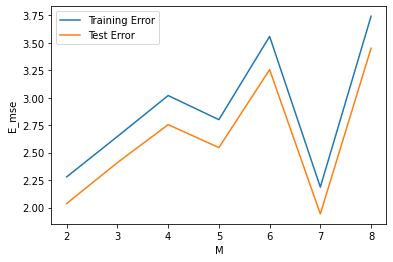

In [85]:
import math


 

def update_weights(X, y, Wt, lr, lamb):
    Wt = Wt-lr*gradient(X, y, Wt, lamb)
    return Wt

def gradient(X, y, Wt, lamb):
    return np.dot(X.T, (predict(X, Wt))-y)/X.shape[0] + lamb*Wt/X.shape[0]

def predict(X, Wt):
    return np.dot(X, Wt)



temp_X_train = train_X
X_new_train = train_X

temp_X_test = test_X
X_new_test = test_X

# lambs = np.logspace(-5, 1, num=7)
lamb = 0.0
N = len(train_X)
M = np.arange(2, 9, 1)
E_rms_train = []
E_rms_test = []

lr = 0.002
# M = np.arange(2, polynomial+1)

# batch_size = 1
for m in M:
    
    temp_X_train = temp_X_train*train_X
    X_new_train = np.c_[X_new_train, temp_X_train]
    X_fin_train = np.c_[np.ones((len(X_new_train), 1)), X_new_train]
    
    temp_X_test = temp_X_test*test_X
    X_new_test = np.c_[X_new_test, temp_X_test]
    X_fin_test = np.c_[np.ones((len(X_new_test), 1)), X_new_test]
    
    batch_size = 1
    wt = np.random.randn(m+1,1)

    for niter in range(10):
#         for i in range(1, len(train_y)//batch_size+1):
        for i in range(0, N, batch_size):
#             X_i = X_fin_train[(i - 1) * batch_size : i * batch_size]
            X_i = X_fin_train[i:i+batch_size]
            
#             print("Idk: ", len(X_i))
            y_i = train_y[i:i+batch_size]
#             y_i = train_y[(i - 1) * batch_size : i * batch_size]
        
#             grad = ((1/batch_size) * X_i.T.dot(X_i.dot(wt) - y_i)) + (lamb/batch_size)*wt
#             wt = wt - lr*grad
            wt = update_weights(X_i, y_i, wt, lr, lamb)
    
    theta_best = wt
    
    y_hat_train = X_fin_train.dot(theta_best)
    temp_val_train = sum((y_hat_train-train_y)**2)
    temp_val_train/=len(train_y)
    E_rms_train.append(temp_val_train)

    y_hat_test = X_fin_test.dot(theta_best)
    temp_val_test = sum((y_hat_test-test_y)**2)
    temp_val_test/=len(test_y)
    E_rms_test.append(temp_val_test) 

# print("Idk: ", len(train_y))
# plt.xscale("log")
# plt.plot(lambs, E_rms_train, label="Training Error")
# plt.plot(lambs, E_rms_test, label="Test Error")
plt.plot(M, E_rms_train, label="Training Error")
plt.plot(M, E_rms_test, label="Test Error")
plt.legend(loc="upper left")
# xticks = np.logspace(-20, -1, num=20)
# plt.xticks(lambs, rotation=90)
# plt.xticks(M)
# plt.xlabel("$\eta$")
plt.xlabel("M")
plt.ylabel("E_mse")
# plt.savefig('something for 20.png')
plt.show() 

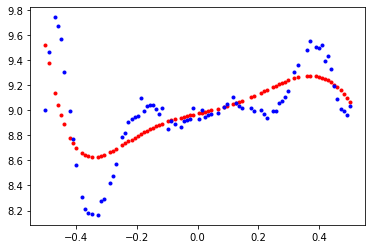

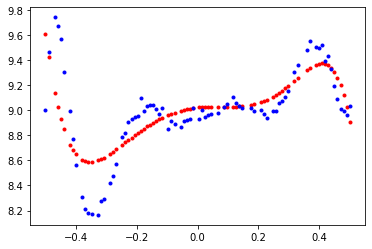

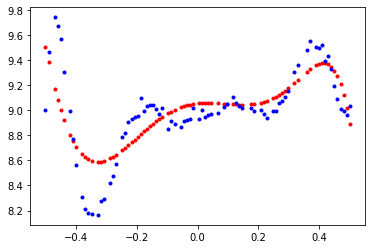

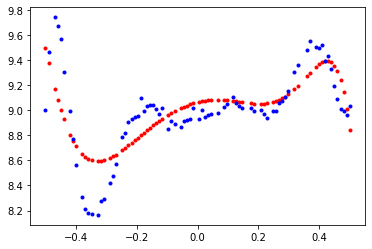

In [185]:
M = np.arange(2, 11, 1)

temp_X_train = train_X
X_new_train = train_X
# lr = 0.0001

lamb=0.0

for m in M:
    temp_X_train = temp_X_train*train_X
#     norm = np.linalg.norm(temp_X_train)
#     temp_X_train=temp_X_train/norm
    norm = (temp_X_train - temp_X_train.min()) / (temp_X_train.max() - temp_X_train.min())
    temp_X_train = norm - np.mean(norm)
    X_new_train = np.c_[X_new_train, temp_X_train]
    X_fin = np.c_[np.ones((len(X_new_train), 1)), X_new_train]
    batch_size = 50
    wt = np.random.randn(m+1,1)

    for niter in range(1000):
        for i in range(0, N, batch_size):
            X_i = X_fin[i:i+batch_size]
            y_i = train_y[i:i+batch_size]
            #print(X_i.shape[0])
            lr = 0.09/(i+0.2)
            wt = update_weights(X_i, y_i, wt, lr, lamb)
    
    if (m>5 and m<10):
        theta_best = wt
        y_hat = X_fin.dot(theta_best)
        plt.plot(train_X, y_hat, "r.")
        plt.plot(train_X, train_y, "b.")
        plt.show()

In [ ]:
print(temp_X_train[:5])
norm
X_fin[:5]